In [60]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units
from matplotlib.gridspec import GridSpec

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation

In [61]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [62]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
lons = np.array(others.variables['lon'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [63]:
z_test_tsne_track = np.load('/fast/hmangipu/MAPS/model_graphs/latent_space/NewData_3D_PCA_Latent_Space__3121600.npy')

#changed scalars here 
Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Unscaled_Randomized_Space_Time_W_Test.npy")


(array([4.50000000e+01, 1.40500000e+03, 2.25903200e+06, 4.77693187e+08,
        4.17430000e+04, 3.83000000e+03, 6.04000000e+02, 1.19000000e+02,
        2.70000000e+01, 8.00000000e+00]),
 array([-16.30590558, -11.34989306,  -6.39388053,  -1.43786801,
          3.51814451,   8.47415703,  13.43016955,  18.38618207,
         23.34219459,  28.29820711,  33.25421963]),
 <a list of 10 Patch objects>)

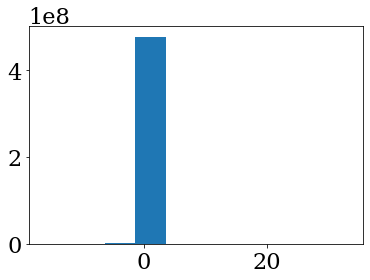

In [64]:
plt.hist(Test_Images.ravel())

In [65]:
W_500_Label_All = np.nanmean(np.abs(np.squeeze(Test_Images[:,-12,:])), axis=1)

In [66]:
print(np.percentile(W_500_Label_All, 90))
print(np.percentile(W_500_Label_All, 10))

0.7866324134058984
0.7716807521711135


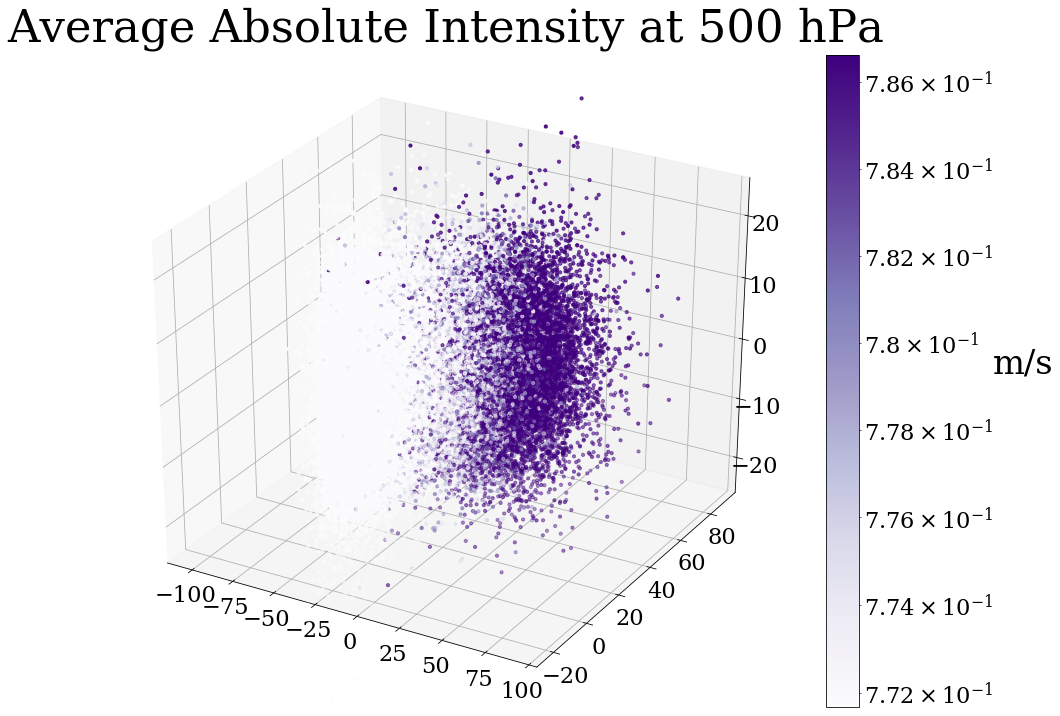

In [67]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')

cp = ax.scatter(xs=z_test_tsne_track[:, 0], ys=z_test_tsne_track[:, 1], zs=z_test_tsne_track[:, 2], c=W_500_Label_All, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmax=np.percentile(W_500_Label_All, 90), vmin=np.percentile(W_500_Label_All, 10))
ax.set_title("Average Absolute Intensity at 500 hPa", fontsize = fz*2.0, y = 1.10)

ax.set_zlim(-25,25)
cbar = fig.colorbar(cp, pad=0.002)
cbar.set_label(label="m/s", rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.55)

# for ii in range(360):
#     ax.view_init(elev=30, azim=ii)
#     if ii < 10:
#         plt.savefig("Png_Storage/Intensity_1600/00"+str(ii)+".png")
#     if ii >= 10 and ii < 100:
#         plt.savefig("Png_Storage/Intensity_1600/0"+str(ii)+".png")
#     if ii >= 100:
#         plt.savefig("Png_Storage/Intensity_1600/"+str(ii)+".png")

In [68]:
geo_label_final = np.load('/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Randomized_Space_Time_Land_Frac.npy')
# next_ds = xr.open_dataset(path)
# land_frac = next_ds.LANDFRAC
# land_frac = xr.DataArray.squeeze(land_frac).values
# trop_land = land_frac[37:59, :]
# geo_labels = np.zeros(shape=(int(len(z_test_tsne_track)/(22*144)), 22, 144))
# geo_labels[:,:,:] = np.nan
# for i in range(len(geo_labels)):
#     geo_labels[i,:,:] = trop_land[:,:]  
# geo_label_final = np.reshape(geo_labels, (geo_labels.size))

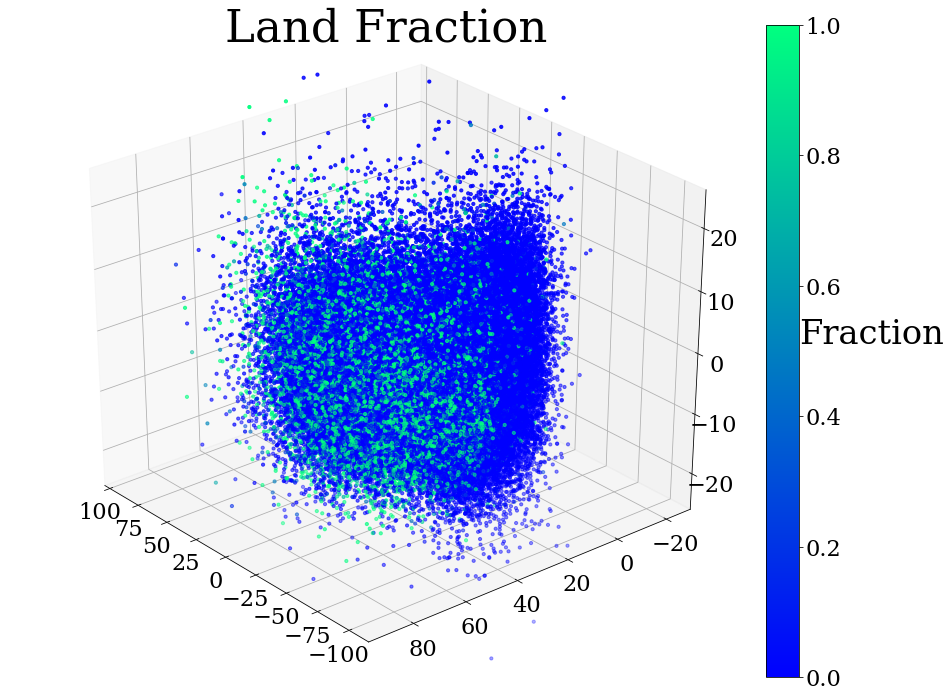

In [69]:

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')

cp = ax.scatter(xs=z_test_tsne_track[:, 0], ys=z_test_tsne_track[:, 1], zs=z_test_tsne_track[:, 2], c=geo_label_final, cmap="winter", s=10.0)
ax.set_title("Land Fraction", fontsize = fz*2.0, y = 1.05)

ax.set_zlim(-25,25)
cbar = fig.colorbar(cp, pad=0.002)
cbar.set_label(label="Fraction", rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.55)
ax.view_init(elev=30, azim=140)

# for ii in range(360):
#     ax.view_init(elev=60, azim=ii)
#     if ii < 10:
#         plt.savefig("Png_Storage/Land_Sea_1600/00"+str(ii)+".png")
#     if ii >= 10 and ii < 100:
#         plt.savefig("Png_Storage/Land_Sea_1600/0"+str(ii)+".png")
#     if ii >= 100:
#         plt.savefig("Png_Storage/Land_Sea_1600/"+str(ii)+".png")

In [70]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Raw_Data_Storage/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc'
extra_variables = xr.open_dataset(path_to_file)
latitudes = np.squeeze(extra_variables.LAT_20s_to_20n.values)
longitudes = np.squeeze(extra_variables.LON_0e_to_360e.values)

In [71]:
MultiVAE_ELBO = np.load("/fast/hmangipu/MAPS/model_graphs/Anomalies/Multichanel_ELBO_Data__3121600.npy")

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(30,15))
gs=GridSpec(1,2)

ax1 = fig.add_subplot(gs[0], projection='3d')

p0 = ax1.get_position().get_points().flatten()
p2 = ax1.get_position().get_points().flatten()

cp = ax1.scatter(xs=z_test_tsne_track[:, 0], ys=z_test_tsne_track[:, 1], zs=z_test_tsne_track[:, 2], c=geo_label_final, cmap='winter', s=10.0, vmin = 0, vmax=1)
# plt.colorbar(cp, label = 'fraction', ax=ax[0])
# ax_cbar = fig.add_axes([p0[0]+0.80, 0.15, p0[1]-0.12, 0.67])
# cbar = fig.colorbar(cp, cax=ax_cbar)
# cbar.set_label('Land Fraction', fontsize=fz*1.25)
cbar_ax = fig.add_axes([0.5, 0.20, 0.01, 0.65])
cbar = fig.colorbar(cp, label='fraction', cax=cbar_ax)

ax1.set_title("Land Fraction (a)", fontsize = fz*2.0, y = 1.05)

# ax1.set_ylim(-20,40)
# ax1.set_xlim(-40,100)
# ax1.set_zlim(-40,20)

# ax1.scatter(xs=100,ys=-5,zs=35,c="black",s=400.0,marker="*")
# ax1.text(100,-5,35,'Weak Conv.',horizontalalignment='right')

# ax1.scatter(xs=-10,ys=30,zs=7,c="black",s=400.0,marker="*")
# ax1.text(30,30,15,'Shallow Conv.',horizontalalignment='right')

# ax1.scatter(xs=-20,ys=-10,zs=25,c="black",s=400.0,marker="*")
# ax1.text(20,-10,25,'Deep Conv.',horizontalalignment='right')

# ax2 = fig.add_subplot(gs[1], projection='3d')

# cp = ax2.scatter(xs=z_test_tsne_track[:, 0], ys=z_test_tsne_track[:, 1], zs=z_test_tsne_track[:, 2], c=MultiVAE_ELBO,s=10.0, vmin=-80000, vmax=-10000)
# plt.colorbar(cp, label = 'ELBO', ax=ax[1])
# ax2.set_title("ELBO Anomaly", fontsize = fz*2.0, y = 1.05)

# ax2.set_ylim(-20,40)
# ax2.set_xlim(-40,100)
# ax2.set_zlim(-40,20)

# ax2.scatter(xs=100,ys=-5,zs=35,c="black",s=400.0,marker="*")
# ax2.text(100,-5,35,'Weak Conv.',horizontalalignment='right')

# ax2.scatter(xs=-10,ys=30,zs=7,c="black",s=400.0,marker="*")
# ax2.text(30,30,15,'Shallow Conv.',horizontalalignment='right')

# ax2.scatter(xs=-20,ys=-10,zs=25,c="black",s=400.0,marker="*")
# ax2.text(20,-10,25,'Deep Conv.',horizontalalignment='right')


ax3 = fig.add_subplot(gs[1], projection='3d')

cp = ax3.scatter(xs=z_test_tsne_track[:, 0], ys=z_test_tsne_track[:, 1], zs=z_test_tsne_track[:, 2], c=W_500_Label_All, cmap='Purples',s=10.0, norm=matplotlib.colors.LogNorm(),vmax=1.0, vmin=0.6)

# plt.colorbar(cp, label = 'fraction', ax=ax[1])

ax3.set_title("Vertical Velocity Intensity (b)", fontsize = fz*2.0, y = 1.05)
cbar_ax = fig.add_axes([0.9, 0.20, 0.01, 0.65])
cbar = fig.colorbar(cp, label='m/s', cax=cbar_ax)

# ax_cbar = fig.add_axes([p0[0]+0.80, 0.15, p0[1]-0.12, 0.67])
# cbar = fig.colorbar(cp, cax=ax_cbar)
# cbar.set_label('Average Absolute Intensity at 500 hPa', fontsize=fz*1.25)

#import elbo labels


fig.delaxes(ax[0])
fig.delaxes(ax[1])
plt.savefig("subplots1600.pdf")
for ii in range(360):
    ax1.view_init(elev=30, azim=ii)
    ax3.view_init(elev=30, azim=ii)
    if ii < 10:
        plt.savefig("Png_Storage/nfigure1/00"+str(ii)+".png")
    if ii >= 10 and ii < 100:
        plt.savefig("Png_Storage/nfigure1/0"+str(ii)+".png")
    if ii >= 100:
        plt.savefig("Png_Storage/nfigure1/"+str(ii)+".png")
  

In [ ]:
plt.hist(W_500_Label_All)